In [175]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

In [176]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

temp_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

temp_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.


In [177]:
temp_df.dtypes

date                   datetime64[ns, UTC]
summary                             object
preciptype                          object
temperature                        float64
apparenttemperature                float64
humidity                           float64
windspeed                          float64
windbearing                        float64
visibility                         float64
loudcover                          float64
pressure                           float64
dailysummary                        object
dtype: object

In [178]:
# The target is the temperature.
# Let's plot a histogram

In [179]:
temp_df.describe()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
count,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000
mean,11.933,10.855,0.735,10.811,187.509,10.347,0.000,1003.236
std,9.552,10.697,0.195,6.914,107.383,4.192,0.000,116.970
min,-21.822,-27.717,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.689,2.311,0.600,5.828,116.000,8.340,0.000,1011.900
50%,12.000,12.000,0.780,9.966,180.000,10.046,0.000,1016.450
75%,18.839,18.839,0.890,14.136,290.000,14.812,0.000,1021.090
max,39.906,39.344,1.000,63.853,359.000,16.100,0.000,1046.380


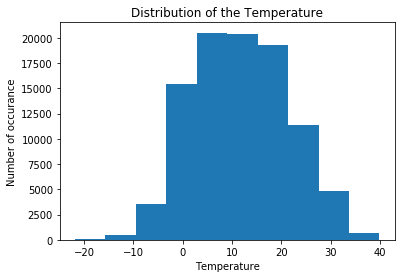

In [180]:
plt.hist(temp_df.temperature)
plt.title("Distribution of the Temperature")
plt.xlabel("Temperature")
plt.ylabel("Number of occurance")
plt.show()

In [181]:
# Very close to normal distribution

In [182]:
# explanatory variables: humidity, windspeed, windbearing, and pressure are 
# float type. No need to use OneHotEncoding for convertion.

#### Modeling the insurance charges with linear regression

In [183]:
# Y is the target variable
Y = temp_df['temperature']
# X is the feature set which includes
# humidity, windspeed, windbearing, and pressure variables
X = temp_df[["humidity", "windspeed", "windbearing","pressure"]]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528512


In [184]:
print(Y)

0        9.472
1        9.356
2        9.378
3        8.289
4        8.756
         ...  
96448   26.017
96449   24.583
96450   22.039
96451   21.522
96452   20.439
Name: temperature, Length: 96453, dtype: float64


#####  our estimated model: temperature =37.93 + −32.49humidity + -0.20windspeed + 0.0040windbearing + -0.000692pressure

In [185]:
temp_df.describe()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
count,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000
mean,11.933,10.855,0.735,10.811,187.509,10.347,0.000,1003.236
std,9.552,10.697,0.195,6.914,107.383,4.192,0.000,116.970
min,-21.822,-27.717,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.689,2.311,0.600,5.828,116.000,8.340,0.000,1011.900
50%,12.000,12.000,0.780,9.966,180.000,10.046,0.000,1016.450
75%,18.839,18.839,0.890,14.136,290.000,14.812,0.000,1021.090
max,39.906,39.344,1.000,63.853,359.000,16.100,0.000,1046.380


In [186]:
# run the same model, this time using statsmodels

In [219]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:58:35   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Check if model meets the Gauss-Markov Conditions

In [220]:
# Assumption one: linearity of the model in its coefficients
# # this is the equation: Y = 1 + 2*X + 3*X^2 + 4*X^3 + 5*X^4 
temp_df["Y"] = 1 + 2*temp_df["humidity"] + 3*temp_df["windspeed"]**2+ 4*temp_df["windbearing"]**3 + 5*temp_df["pressure"]**4

In [221]:
# our estimated model: temperature =
# 37.93 + −32.49humidity + -0.20windspeed + 0.0040windbearing + -0.000692pressure

In [222]:
temp_df["Y"] = 37.93 + 2*(-32.49) + 3*(-0.2)**2 + 4*(0.004)**3 + 5*(-0.000692)**4

In [224]:
# we fit a linear regression where target is Y
# and features are X^1,X^2, X^3 and X^4
from sklearn import linear_model
lrm_example = linear_model.LinearRegression()
lrm_example.fit(temp_df[["humidity", "windspeed", "windbearing", "pressure"]],temp_df["Y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [218]:
# Y is the target variable
Y = temp_df['temperature']
# X is the feature set which includes
# humidity, windspeed, windbearing, and pressure variables
X = temp_df[["humidity", "windspeed", "windbearing","pressure"]]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528512


In [197]:
# predictions of the linear regression
predictions = lrm_example.predict(temp_df[["humidity", "windspeed", "windbearing", "pressure"]])
# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)


Coefficients: 
 [-4.04940062e-29 -2.40151446e-31  4.76400820e-33  4.22896569e-33]

Intercept: 
 -26.929999743998852


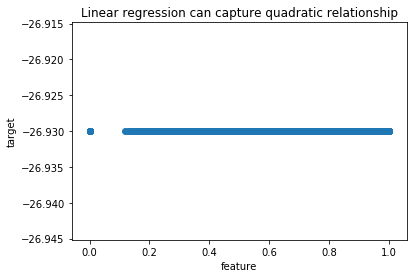

In [208]:
# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(temp_df["humidity"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

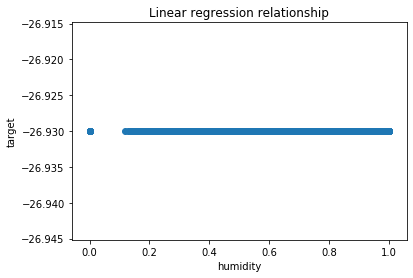

In [214]:
# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(temp_df["humidity"], predictions)
plt.xlabel("humidity")
plt.ylabel("target")
plt.title('Linear regression relationship')
plt.show()

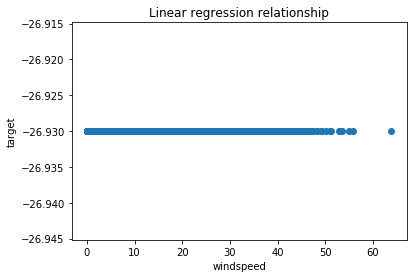

In [215]:
plt.scatter(temp_df["windspeed"], predictions)
plt.xlabel("windspeed")
plt.ylabel("target")
plt.title('Linear regression relationship')
plt.show()

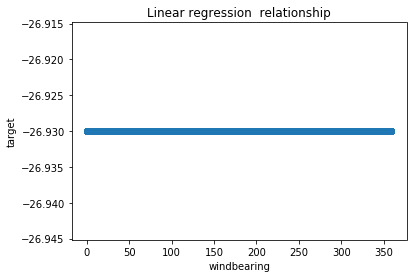

In [216]:
plt.scatter(temp_df["windbearing"], predictions)
plt.xlabel("windbearing")
plt.ylabel("target")
plt.title('Linear regression  relationship')
plt.show()

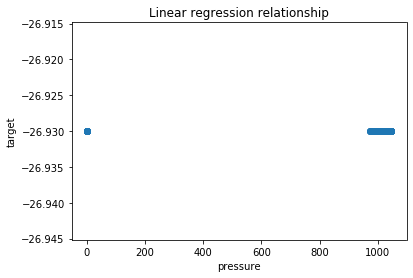

In [217]:
plt.scatter(temp_df["pressure"], predictions)
plt.xlabel("pressure")
plt.ylabel("target")
plt.title('Linear regression relationship')
plt.show()